## 1. Fragestellung(en) und Datenbeschaffung
Gruppe: Phi Phi Cung und Lou-Salomé Frehner
### 1.1 Titel: 
- Sterblichkeitsrate von Atemwegsinfektionen pro 100'000 Personen von 1950 bis 2022
### 1.2 Fragestellung:
- "Welche 5 Länder hatten von 2000 bis 2020 die grösste Zunahme bzw. Abnahme der Sterblichkeitsrate durch Atemwegsinfektionen?"
### 1.3 Datenquelle(n):
https://ourworldindata.org/grapher/respiratory-infection-death-rate-who-mdb




### 1.4 Daten beschaffen und laden

In [25]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [26]:
# lade hier deine Daten
df = pd.read_csv('respiratory-infection-death-rate-who-mdb.csv', skiprows=1, 
                 names=['Entity','Code','year','Age-standardized deaths from respiratory infections in both sexes per 100,000 people'])
df.head()


,Entity,Code,year,"Age-standardized deaths from respiratory infections in both sexes per 100,000 people"
0,Albania,ALB,1987,69.32097
1,Albania,ALB,1988,59.96708
2,Albania,ALB,1989,75.36185
3,Albania,ALB,1992,64.09694
4,Albania,ALB,1993,69.78366


## 2. Daten vorbereiten 
Der Datensatz hat das Long-Format:

Jede Zeile repräsentiert eine Beobachtung, bestehend aus den folgenden Spalten:
- Länder: Der Name des Landes (z. B. Kanada, Australien).
- Code: Der standardisierte Ländercode (z. B. CAN, AUS).
- Jahr: Das Jahr der Beobachtung (z. B. 1950, 2022).
- Todesfälle durch Atemwegsinfektionen: Die altersstandardisierte Sterblichkeitsrate pro 100.000 Personen.
- Im Long-Format sind die Werte für die Todesfallrate in einer Spalte organisiert, während die übrigen Spalten Kategorien oder Indizes darstellen.

Die Datentypen im Datensatz sind:

Länder: object (String; textbasiert, z. B. "Kanada").
Code: object (String; textbasiert, z. B. "CAN").
Jahr: int64 (Ganzzahl; numerisch, z. B. 1950, 2022).
Todesfälle: float64 (Dezimalzahl; kontinuierlich, z. B. 69.32).

In [27]:
df_pivot = df.pivot(index='Entity', columns='year', values='Age-standardized deaths from respiratory infections in both sexes per 100,000 people')
df_pivot.head()

year,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Entity,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.206214,19.790750,32.962810,17.233988,12.686172,26.913685,17.549429,25.599234,103.138080,NaN
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.840980,41.425716,46.261000,55.549500,52.927692,49.750935,50.036976,129.054060,196.347100,NaN
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.797947,14.825234,18.150202,21.427942,22.369265,33.270714,32.871216,136.314000,178.072220,59.339447
Australia,44.541817,46.18928,40.555084,36.833664,40.231956,35.56524,39.746117,42.80438,34.36434,47.42999,...,5.370212,6.066640,6.208516,6.525617,8.127273,5.351823,7.287782,5.021166,5.508817,19.580791


## 3. Statistik der Rohdaten (Analyse im Long-Format)
über die einzelnen Spalten kann folgendes ausgesagt werden:
- Die Spalte *Year* enthält 117 verschiede Länder
- Die Spalte *Codes* enthält 117 verschiedene Codes
- Es sind Daten zwischen 1950 and 2022 vorhanden
- Die Todesfälle durch Atemwegsinfektionen streuen zwischen 1.05 und 377.28 pro 100.000 Personen.
- Die Variable "Sterblichkeitsrate durch Atemwegsinfektionen" ist kontinuierlich, da sie numerische Werte mit Dezimalstellen enthält. 
- ⁠ Es gibt insgesamt 4 Spalten in den Daten.
- Für jede Spalte liegen keine fehlenden Werte vor (alle Daten sind vollständig).
- Das Jahr mit den meisten Datenpunkten ist 2010 (96 Einträge). 
- ⁠Länder wie Kanada, Niederlande, Japan, Australien und Schweden haben jeweils über 72 Einträge. 
- ⁠Das Histogramm zeigt, dass die meisten Todesfälle pro 100.000 Personen im Bereich unter 50 liegen, mit einigen Ausreissern über 300.




In [28]:
df_long = pd.read_csv('respiratory-infection-death-rate-who-mdb.csv')

In [29]:
df_long

,Entity,Code,Year,"Age-standardized deaths from respiratory infections in both sexes per 100,000 people"
0,Albania,ALB,1987,69.320970
1,Albania,ALB,1988,59.967080
2,Albania,ALB,1989,75.361850
3,Albania,ALB,1992,64.096940
4,Albania,ALB,1993,69.783660
...,...,...,...,...
4636,Venezuela,VEN,2012,21.126587
4637,Venezuela,VEN,2013,23.221132
4638,Venezuela,VEN,2014,25.174698
4639,Venezuela,VEN,2015,27.281538


### 3.1 Analyse Länder

In [30]:
print('Anzahl verschiedener Länder: ', len(df['Entity'].unique()))

Anzahl verschiedener Länder:  117


In [31]:
# Anzahl Datenpunkte pro Land
df['Entity'].value_counts()

Entity
Canada                   73
Netherlands              73
Japan                    72
Australia                72
Sweden                   72
                         ..
Sao Tome and Principe     3
Lebanon                   3
Cape Verde                2
Saudi Arabia              2
Syria                     1
Name: count, Length: 117, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Land'}, xlabel='Entity', ylabel='Anzahl Datenpunkte'>

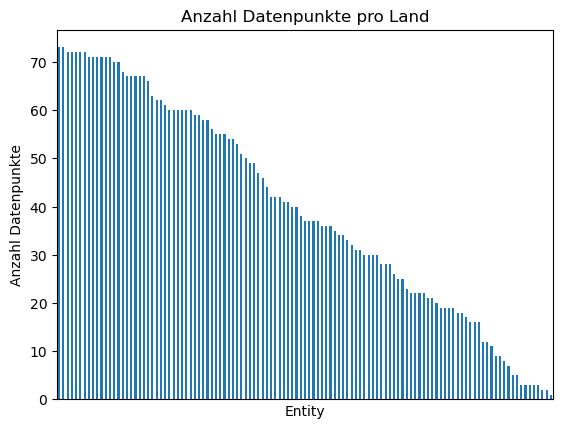

In [32]:
df['Entity'].value_counts().plot(kind='bar', 
                                 xticks=[],     # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Land')

### 3.2 Analyse Codes

In [33]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  117


In [34]:
# Anzahl Datenpunkte pro Land
df['Code'].value_counts()

Code
CAN    73
NLD    73
JPN    72
AUS    72
SWE    72
       ..
STP     3
LBN     3
CPV     2
SAU     2
SYR     1
Name: count, Length: 117, dtype: int64

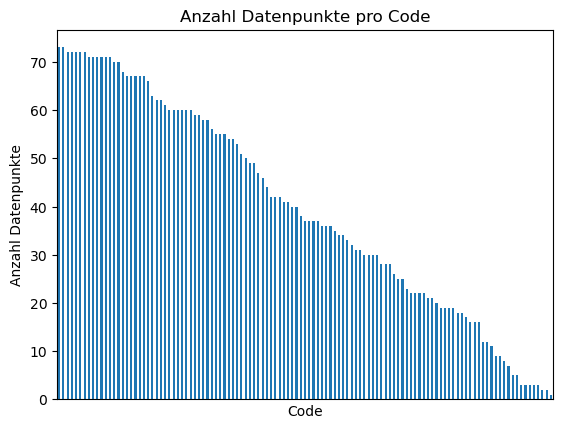

In [35]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

### 3.3 Analyse Jahr

In [36]:
print('Anzahl verschiedener Jahre: ', len(df['year'].unique()))

Anzahl verschiedener Jahre:  73


In [37]:
# Anzahl Datenpunkte pro Jahr
df['year'].value_counts().sort_index()

year
1950     9
1951    17
1952    18
1953    19
1954    20
        ..
2018    82
2019    80
2020    65
2021    51
2022    15
Name: count, Length: 73, dtype: int64

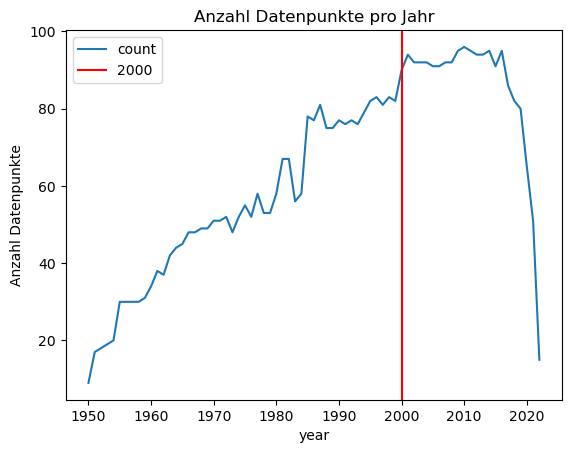

In [65]:
# Jahre mit maximaler Anzahl Datenpunkte (257)
g = df['year'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=2000, color='red',label='2000') # rote Linie bei 2000 - ab hier sind alle Jahre enthalten
g.legend()  # Legende anzeigen

### 3.4 Analyse

In [39]:
df.describe()

,year,"Age-standardized deaths from respiratory infections in both sexes per 100,000 people"
count,4641.000000,4641.000000
mean,1992.667313,34.196449
std,18.426826,32.514145
min,1950.000000,1.054690
25%,1979.000000,14.062974
50%,1995.000000,24.384080
75%,2008.000000,43.247025
max,2022.000000,377.275300


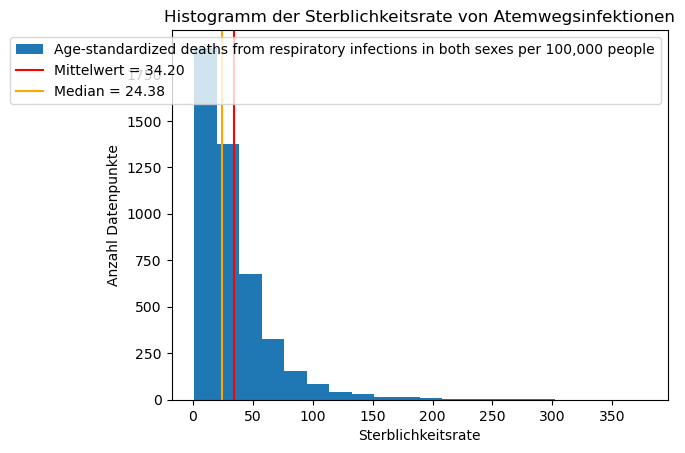

In [40]:
g = df['Age-standardized deaths from respiratory infections in both sexes per 100,000 people'].plot(kind='hist', bins=20, title='Histogramm der Sterblichkeitsrate von Atemwegsinfektionen', 
                           xlabel='Sterblichkeitsrate', ylabel='Anzahl Datenpunkte')
mean = df['Age-standardized deaths from respiratory infections in both sexes per 100,000 people'].mean()
g.axvline(x=df['Age-standardized deaths from respiratory infections in both sexes per 100,000 people'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['Age-standardized deaths from respiratory infections in both sexes per 100,000 people'].median()
g.axvline(x=df['Age-standardized deaths from respiratory infections in both sexes per 100,000 people'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()


## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



In [97]:
# Daten filtern: Nur für den Zeitraum 2000-2020
df_filtered = df_sorted[(df_sorted['Year'] >= 2000) & (df_sorted['Year'] <= 2020)]

# Start- und Endrate berechnen pro 'Entity'
sterblichkeit_veraenderung = df_filtered.groupby('Entity').agg(
    start_rate=('Age-standardized deaths from respiratory infections in both sexes per 100,000 people', 
                lambda x: x.iloc[0]),  # Wert aus dem ersten verfügbaren Jahr (2000)
    end_rate=('Age-standardized deaths from respiratory infections in both sexes per 100,000 people', 
              lambda x: x.iloc[-1])    # Wert aus dem letzten verfügbaren Jahr (2020)
)

In [98]:
sterblichkeit_veraenderung['change'] = sterblichkeit_veraenderung['end_rate'] - sterblichkeit_veraenderung['start_rate']

In [99]:
# Daten auf den Zeitraum 2000-2020 filtern
df_filtered = df_long.query("Year >= 2000 and Year <= 2020")

# Daten sortieren und aggregieren wie zuvor
df_sorted = df_filtered.sort_values(by=['Entity', 'Year'])

# Start- und Endraten berechnen
sterblichkeit_veraenderung = df_sorted.groupby('Entity').agg(
    start_rate=('Age-standardized deaths from respiratory infections in both sexes per 100,000 people', lambda x: x.iloc[0]),  # Wert aus dem ersten Jahr (2000)
    end_rate=('Age-standardized deaths from respiratory infections in both sexes per 100,000 people', lambda x: x.iloc[-1])  # Wert aus dem letzten Jahr (2020)
)

# Veränderung berechnen
sterblichkeit_veraenderung['change'] = sterblichkeit_veraenderung['end_rate'] - sterblichkeit_veraenderung['start_rate']

# Top 5 Länder mit der größten Zunahme
top5_zunahme = sterblichkeit_veraenderung.nlargest(5, 'change')
print("Top 5 Länder mit der größten Zunahme der Sterblichkeitsrate (2000-2020):")
print(top5_zunahme)

# Top 5 Länder mit der größten Abnahme
top5_abnahme = sterblichkeit_veraenderung.nsmallest(5, 'change')
print("\nTop 5 Länder mit der größten Abnahme der Sterblichkeitsrate (2000-2020):")
print(top5_abnahme)

Top 5 Länder mit der größten Zunahme der Sterblichkeitsrate (2000-2020):
           start_rate   end_rate      change
Entity                                      
Peru        55.273655  300.37323  245.099575
Mexico      19.451471  208.58951  189.138039
Ecuador     25.957628  185.93886  159.981232
Armenia     10.077287  136.31400  126.236713
Argentina   23.615032  129.05406  105.439028

Top 5 Länder mit der größten Abnahme der Sterblichkeitsrate (2000-2020):
              start_rate   end_rate     change
Entity                                        
South Africa   96.539670  51.836914 -44.702756
Tajikistan     53.130035   9.178508 -43.951527
Kyrgyzstan     39.970634  11.290003 -28.680631
Belize         51.554783  25.070015 -26.484768
Albania        28.050459   3.104083 -24.946376


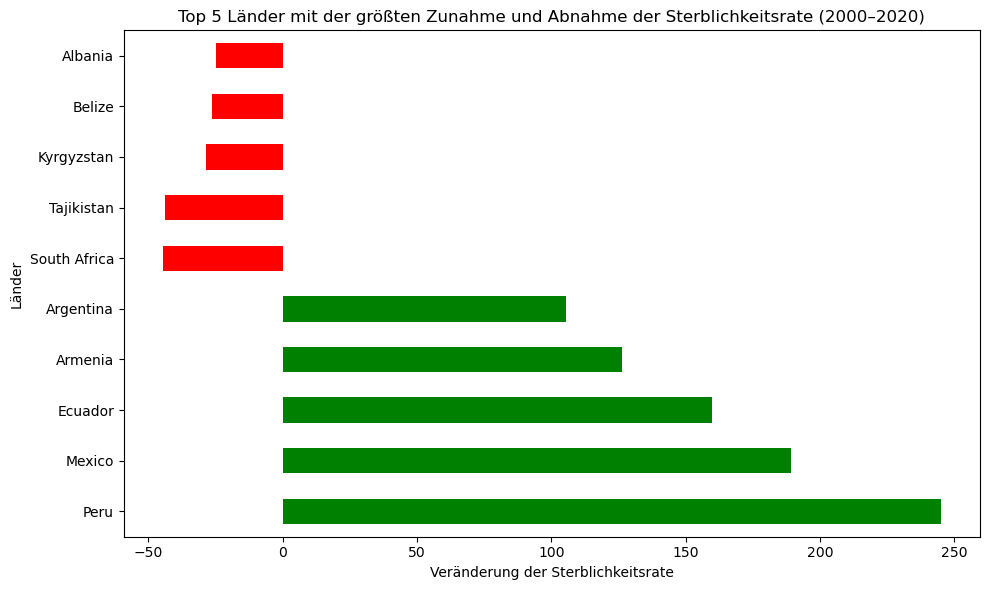

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Berechnung der Veränderung der Sterblichkeitsrate
sterblichkeit_veraenderung['change'] = sterblichkeit_veraenderung['end_rate'] - sterblichkeit_veraenderung['start_rate']

# Top 5 Länder mit der größten Zunahme und Abnahme
top5_zunahme = sterblichkeit_veraenderung.nlargest(5, 'change')  # Größte Zunahme
top5_abnahme = sterblichkeit_veraenderung.nsmallest(5, 'change')  # Größte Abnahme

# Daten kombinieren
top5_combined = pd.concat([top5_zunahme, top5_abnahme])

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))  # Größe des Diagramms

# Farben festlegen: Grün für Zunahme, Rot für Abnahme
colors = ['green' if x > 0 else 'red' for x in top5_combined['change']]

# Balkendiagramm plotten
top5_combined['change'].plot(kind='barh', color=colors)

# Diagramm beschriften
plt.title("Top 5 Länder mit der größten Zunahme und Abnahme der Sterblichkeitsrate (2000–2020)")
plt.xlabel("Veränderung der Sterblichkeitsrate")
plt.ylabel("Länder")
plt.yticks(range(len(top5_combined)), top5_combined.index)

# Layout optimieren und anzeigen
plt.tight_layout()
plt.show()


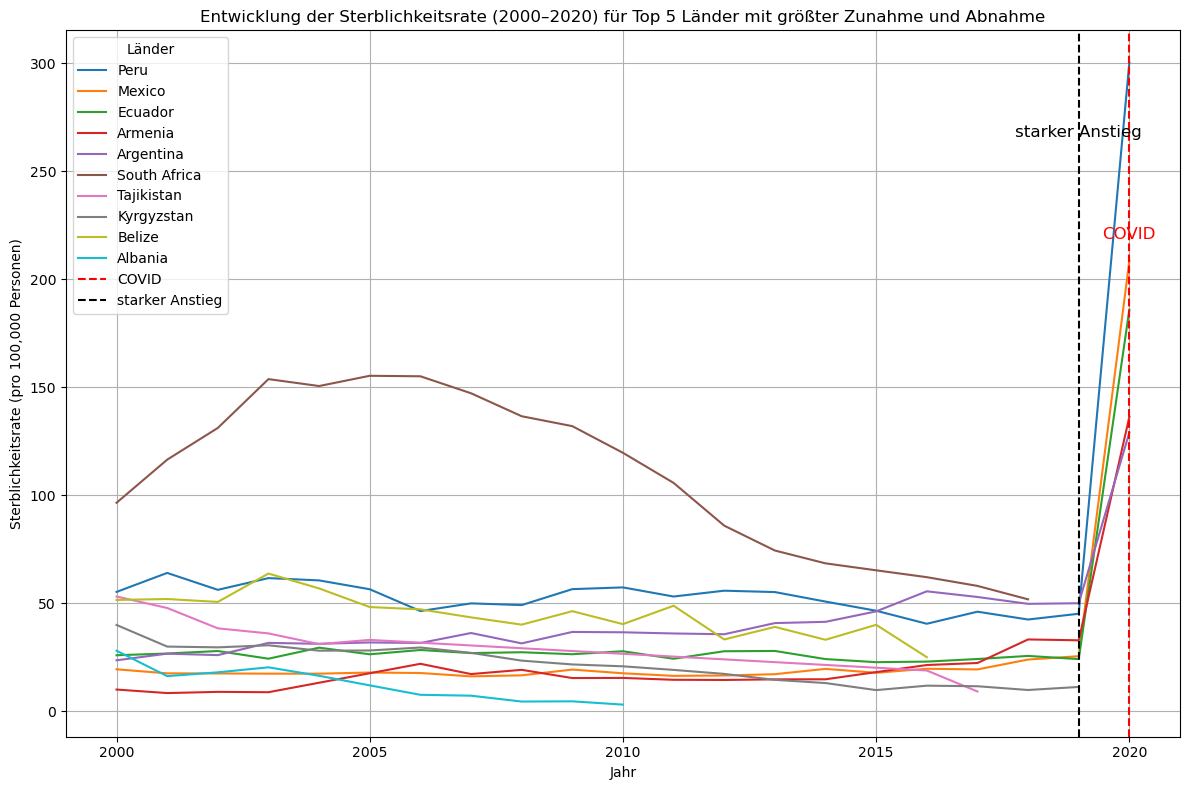

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Länder auswählen: Top 5 Zunahme und Abnahme der Sterblichkeitsrate
top5_lander = pd.concat([top5_zunahme, top5_abnahme]).index  # Kombinierte Länder

# Daten für die ausgewählten Länder im Zeitraum 2000–2020 filtern
filtered_data = df_sorted[
    (df_sorted['Year'] >= 2000) & (df_sorted['Year'] <= 2020) & (df_sorted['Entity'].isin(top5_lander))
]

# Liniendiagramm erstellen
plt.figure(figsize=(12, 8))

# Für jedes Land die Entwicklung der Sterblichkeitsrate plotten
for land in top5_lander:
    land_data = filtered_data[filtered_data['Entity'] == land]
    plt.plot(land_data['Year'], 
             land_data['Age-standardized deaths from respiratory infections in both sexes per 100,000 people'], 
             label=land)

# Eine gestrichelte Linie für das Jahr 2020 (COVID) hinzufügen
plt.axvline(x=2020, color='red', linestyle='--', label='COVID')

# Eine vertikale, gestrichelte Linie für das Jahr 2019 (starker Anstieg) hinzufügen
plt.axvline(x=2019, color='black', linestyle='--', label='starker Anstieg')

# Diagramm beschriften
plt.title("Entwicklung der Sterblichkeitsrate (2000–2020) für Top 5 Länder mit größter Zunahme und Abnahme")
plt.xlabel("Jahr")
plt.ylabel("Sterblichkeitsrate (pro 100,000 Personen)")
plt.legend(title="Länder", loc='upper left')
plt.grid(True)

# Beschriftung für die COVID-Linie bei 2020 hinzufügen (weiter oben)
plt.text(2020, plt.ylim()[1]*0.70, 'COVID', color='red', ha='center', va='center', fontsize=12)

# Beschriftung für die Linie bei 2019 hinzufügen (weiter unten)
plt.text(2019, plt.ylim()[1]*0.85, 'starker Anstieg', color='black', ha='center', va='center', fontsize=12)

# Anpassung der x-Achse: Nur spezifische Jahre anzeigen
plt.xticks([2000, 2005, 2010, 2015, 2020])  # Zeigt nur die gewünschten Jahre auf der x-Achse

# Layout optimieren und anzeigen
plt.tight_layout()
plt.show()
